In [1]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

sys.path.append('../')
from tsgen import TsGenerator
tsgen = TsGenerator()
tsgen.imgdpi = 100

Declaring class instance from: S3-FRBR:Nc_Explorer
Input NetCDF file folde not set. Proceed at your own risk.


## Generating some data and saving where we can fetch it later.

In [12]:
svpt1 = 'D:\\processing\\plt_test\\a.png'
svpt2 = 'D:\\processing\\plt_test\\b.png'
svpt3 = 'D:\\processing\\plt_test\\c.png'
svpt4 = 'D:\\processing\\plt_test\\d.png'
svpt5 = 'D:\\processing\\plt_test\\e.png'
svpt6 = 'D:\\processing\\plt_test\\report.pdf'

#### IMG A - Scatter MAP

In [3]:
workdir = 'D:\processing\win\MANACAPURU'
img = 'S3A_OL_2_WFR____20191104T135002_20191104T135302_20191124T134508_0179_051_124_3060_MAR_O_NT_002_subset.txt'

fullpath = os.path.join(workdir,img)

figdate = os.path.basename(fullpath).split('____')[1].split('_')[0]

df = pd.read_csv(fullpath,sep='\t',skiprows=1)

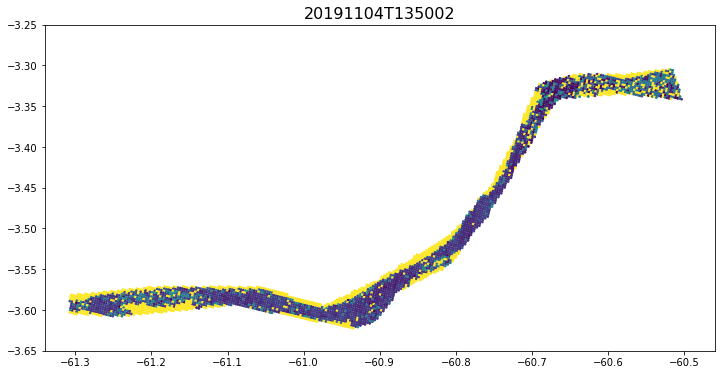

In [4]:
plt.rcParams['figure.figsize'] = [12, 6]
fig = plt.figure()
ax = plt.axes()
ax.set_title(figdate, fontsize=16)
ax.scatter(df['longitude:double'],df['latitude:double'],c=df['T865:float'],s=3)
ax.set_xlim(-61.34,-60.46)
ax.set_ylim(-3.65,-3.25)
plt.savefig(svpt1, dpi=100)

#### IMG B - RAW Scatter

In [5]:
print(f'Generating image')

tsgen.plot_sidebyside_sktr(x1_data=df['Oa08_reflectance:float'],
                           y1_data=df['Oa17_reflectance:float'],
                           x2_data=df['Oa08_reflectance:float'],
                           y2_data=df['Oa17_reflectance:float'],
                           x_lbl='RED: Oa08 (665nm)',
                           y_lbl='NIR: Oa17 (865nm)',
                           c1_data=df['A865:float'],
                           c1_lbl='Aer. Angstrom Expoent (A865)',
                           c2_data=df['T865:float'],
                           c2_lbl='Aer. Optical Thickness (T865)',
                           title=f'MANACAPURU v6 WFR {figdate} RED:Oa08(665nm) x NIR:Oa17(865nm)',
                           savepathname=svpt2)

Generating image


#### IMG C - Filtered Scatter

In [6]:
_, df = tsgen.update_csvs(csv_path=fullpath,threshold=0.2)

print(f'Generating image')

tsgen.plot_sidebyside_sktr(x1_data=df['Oa08_reflectance:float'],
                           y1_data=df['Oa17_reflectance:float'],
                           x2_data=df['Oa08_reflectance:float'],
                           y2_data=df['Oa17_reflectance:float'],
                           x_lbl='RED: Oa08 (665nm)',
                           y_lbl='NIR: Oa17 (865nm)',
                           c1_data=df['A865:float'],
                           c1_lbl='Aer. Angstrom Expoent (A865)',
                           c2_data=df['T865:float'],
                           c2_lbl='Aer. Optical Thickness (T865)',
                           title=f'MANACAPURU v6 WFR {figdate} RED:Oa08(665nm) x NIR:Oa17(865nm)',
                           savepathname=svpt3)

Calculating GLINT column...
Generating image


#### IMG C - KD Histogram

In [7]:
x = df['Oa08_reflectance:float'].copy()

pk,xray,yray,kde_res = tsgen.kde_local_maxima(x)

tsgen.plot_kde_hist(figdate,xray,yray,x,kde_res,pk,svpt4)

#### IMG D - Reflectance

..\tsgen.py:822: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


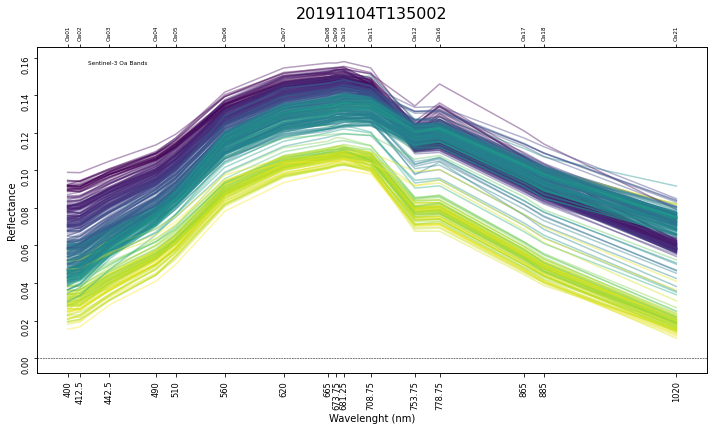

In [8]:
tsgen.s3l2_custom_reflectance_plot(df=df, figure_title=figdate, save_title=svpt5)

## Report

In [10]:
from PIL import Image
import numpy as np

def pil_grid(images, max_horiz=np.iinfo(int).max):
    n_images = len(images)
    n_horiz = min(n_images, max_horiz)
#     h_sizes, v_sizes = [0] * n_horiz, [0] * (n_images // n_horiz)
    h_sizes, v_sizes = [0] * n_horiz, [0] * ((n_images // n_horiz) + (1 if n_images % n_horiz > 0 else 0))
    for i, im in enumerate(images):
        h, v = i % n_horiz, i // n_horiz
        h_sizes[h] = max(h_sizes[h], im.size[0])
        v_sizes[v] = max(v_sizes[v], im.size[1])
    h_sizes, v_sizes = np.cumsum([0] + h_sizes), np.cumsum([0] + v_sizes)
    im_grid = Image.new('RGB', (h_sizes[-1], v_sizes[-1]), color='white')
    for i, im in enumerate(images):
        im_grid.paste(im, (h_sizes[i % n_horiz], v_sizes[i // n_horiz]))
    return im_grid

In [13]:
images = [Image.open(x) for x in [svpt1,svpt2,svpt3,svpt4,svpt5]]

report = pil_grid(images, 1)
report.save(svpt6)